# Importing Various Modules and Loading the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [16]:
df=pd.read_csv("./Downloads/voice.csv")  #Reading the csv file

#  Exploratory Data Analysis

In [3]:
df.head(10)  #See the first 10 rows

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [4]:
df.tail(10)  #See the bottom 10 rows

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,...,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,female
3159,0.168794,0.085842,0.188980,0.095558,0.240229,0.144671,1.462248,5.077956,0.956201,0.706861,...,0.168794,0.182863,0.020699,0.271186,0.988281,0.007812,5.882812,5.875000,0.268617,female
3160,0.151771,0.089147,0.185970,0.058159,0.230199,0.172040,1.227710,4.304354,0.962045,0.744590,...,0.151771,0.201600,0.023426,0.266667,0.766741,0.007812,4.007812,4.000000,0.192220,female
3161,0.170656,0.081237,0.184277,0.113012,0.239096,0.126084,1.378256,5.431663,0.950750,0.658558,...,0.170656,0.198475,0.160000,0.253968,0.414062,0.007812,0.734375,0.726562,0.336918,female
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,...,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,female
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,...,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [6]:
df = df.sample(frac=1).reset_index(drop=True) #Shuffle the data
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.202450,0.043619,0.206862,0.164668,0.231963,0.067295,1.431085,5.170582,0.906899,0.184218,...,0.202450,0.132458,0.017204,0.235294,0.640951,0.007812,4.789062,4.781250,0.089951,male
1,0.208139,0.057951,0.232753,0.141243,0.256128,0.114885,1.564845,4.995825,0.867978,0.179824,...,0.208139,0.131917,0.051724,0.274286,0.881359,0.023438,6.093750,6.070312,0.091628,male
2,0.127480,0.067121,0.111466,0.093812,0.185367,0.091554,3.024085,14.419170,0.930031,0.598873,...,0.127480,0.071739,0.015920,0.262295,0.151727,0.015625,0.679688,0.664062,0.273132,male
3,0.210657,0.034482,0.214067,0.188807,0.232477,0.043670,2.098559,8.205411,0.857533,0.193523,...,0.210657,0.171128,0.047525,0.277457,0.877232,0.023438,4.500000,4.476562,0.080745,female
4,0.182159,0.059695,0.192054,0.126452,0.222479,0.096027,1.591843,6.235324,0.922121,0.464985,...,0.182159,0.130391,0.048485,0.277457,1.118555,0.023438,4.664062,4.640625,0.096878,male


In [7]:
df.shape

(3168, 21)

In [8]:
df.isnull().values.any()  #Check whether there is NULL value

False

In [9]:
df.corr().head()  #Correlation between different features 


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475


Text(0.5, 1, 'Correlation')

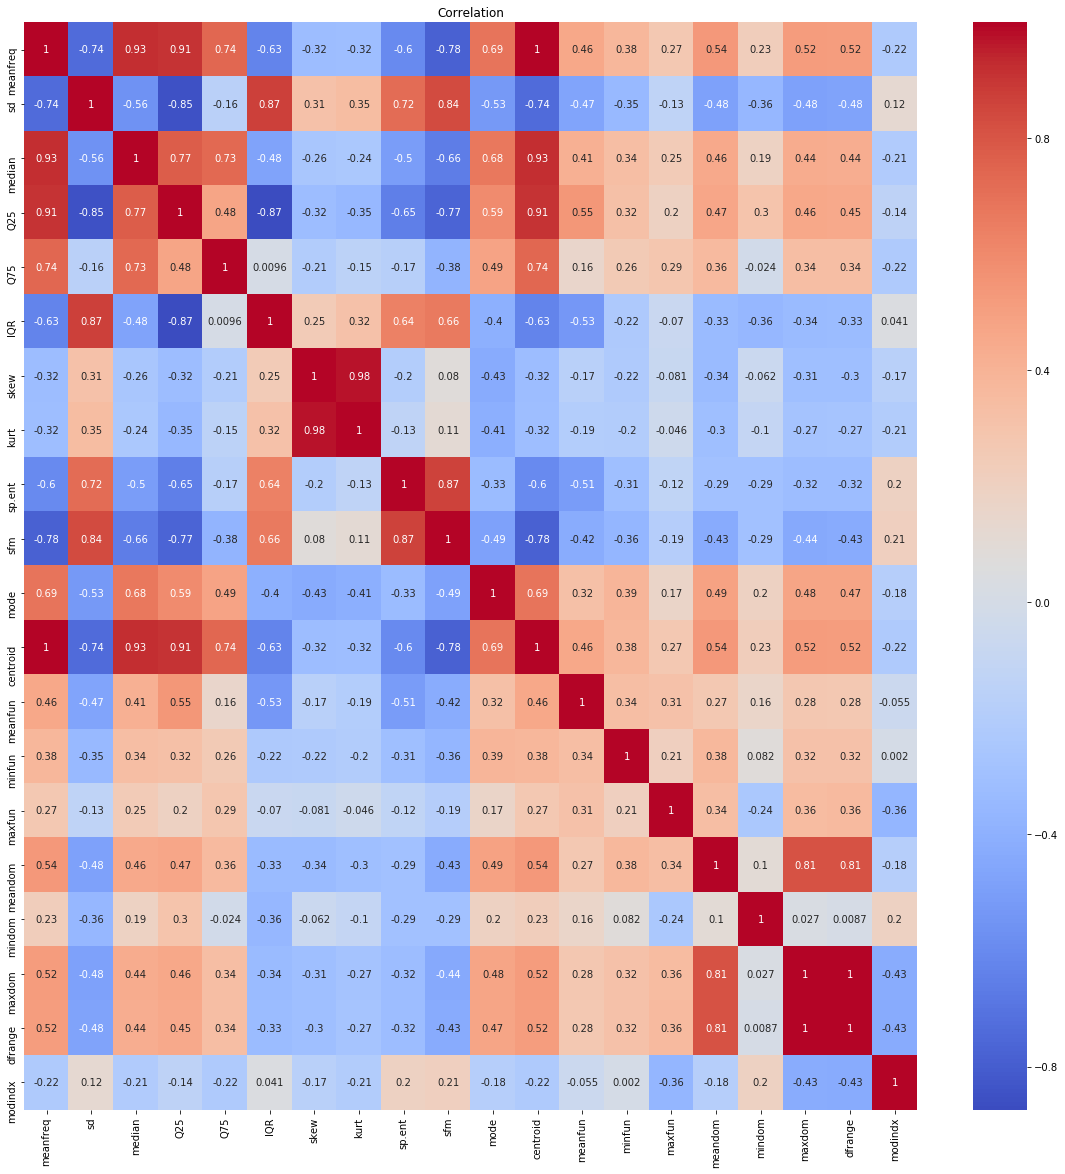

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set_title('Correlation')

In [11]:
df.set_index('label').idxmax()  #Maximum value for a feature 

meanfreq    female
sd          female
median      female
Q25         female
Q75         female
IQR         female
skew        female
kurt        female
sp.ent        male
sfm         female
mode          male
centroid    female
meanfun     female
minfun      female
maxfun      female
meandom     female
mindom        male
maxdom        male
dfrange       male
modindx       male
dtype: object

In [12]:
df.set_index('label').idxmin()  #Minimum value for a feature

meanfreq      male
sd          female
median        male
Q25         female
Q75           male
IQR         female
skew        female
kurt          male
sp.ent      female
sfm         female
mode          male
centroid      male
meanfun       male
minfun      female
maxfun        male
meandom     female
mindom      female
maxdom      female
dfrange     female
modindx     female
dtype: object

In [13]:
df["label"].value_counts()  #count for the label

male      1584
female    1584
Name: label, dtype: int64

In [14]:
df1= df.copy()
df1.drop('label', axis=1, inplace=True)
df1.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.202450,0.043619,0.206862,0.164668,0.231963,0.067295,1.431085,5.170582,0.906899,0.184218,0.225688,0.202450,0.132458,0.017204,0.235294,0.640951,0.007812,4.789062,4.781250,0.089951
1,0.208139,0.057951,0.232753,0.141243,0.256128,0.114885,1.564845,4.995825,0.867978,0.179824,0.261101,0.208139,0.131917,0.051724,0.274286,0.881359,0.023438,6.093750,6.070312,0.091628
2,0.127480,0.067121,0.111466,0.093812,0.185367,0.091554,3.024085,14.419170,0.930031,0.598873,0.100587,0.127480,0.071739,0.015920,0.262295,0.151727,0.015625,0.679688,0.664062,0.273132
3,0.210657,0.034482,0.214067,0.188807,0.232477,0.043670,2.098559,8.205411,0.857533,0.193523,0.215780,0.210657,0.171128,0.047525,0.277457,0.877232,0.023438,4.500000,4.476562,0.080745
4,0.182159,0.059695,0.192054,0.126452,0.222479,0.096027,1.591843,6.235324,0.922121,0.464985,0.191579,0.182159,0.130391,0.048485,0.277457,1.118555,0.023438,4.664062,4.640625,0.096878


C:\Users\Yash Shetty\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

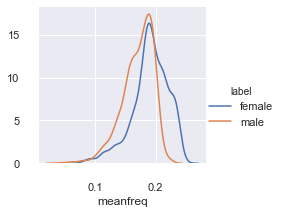

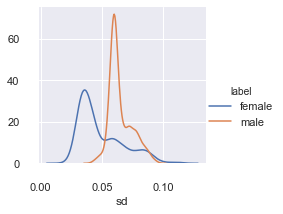

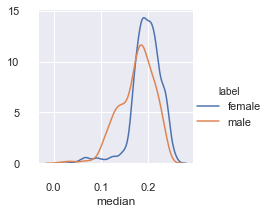

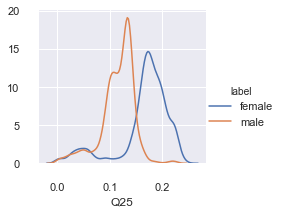

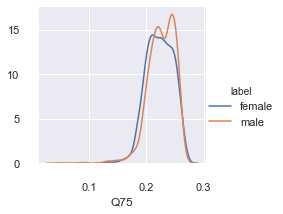

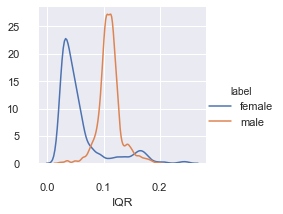

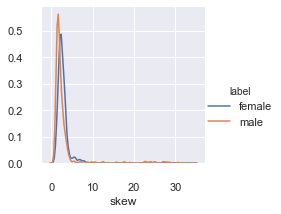

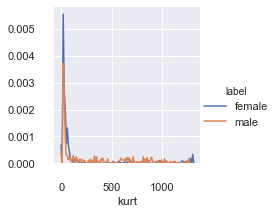

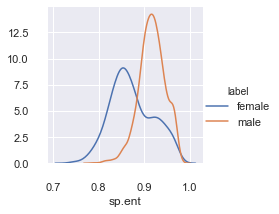

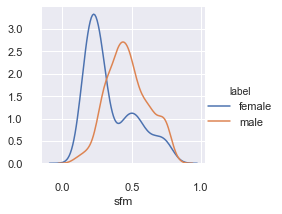

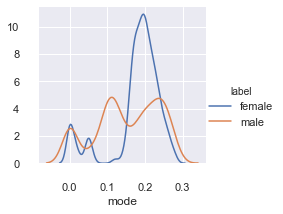

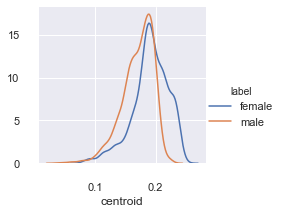

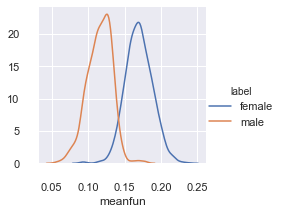

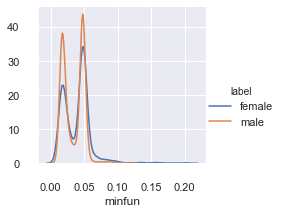

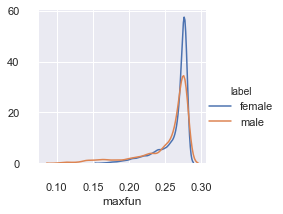

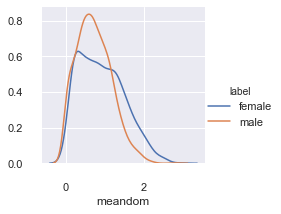

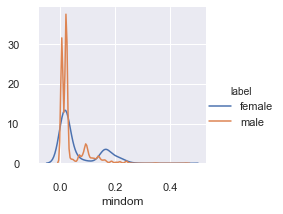

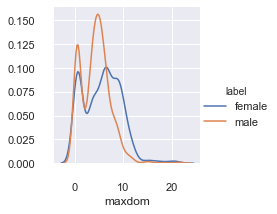

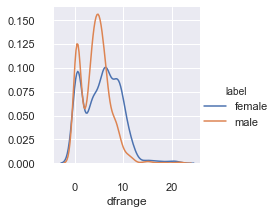

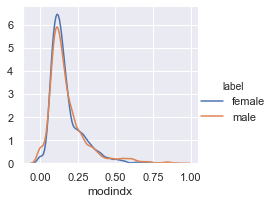

In [15]:
for i in df1.columns:
    sns.set(style="darkgrid")
    sns.despine(offset=10, trim=True)
    a=sns.FacetGrid(df, hue="label") 
    a.map(sns.kdeplot, i) 
    a.add_legend()
plt.show()

C:\Users\Yash Shetty\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yash Shetty\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yash Shetty\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catpl

<Figure size 432x288 with 0 Axes>

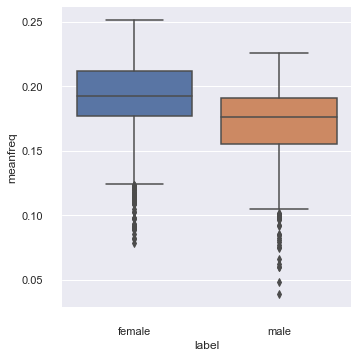

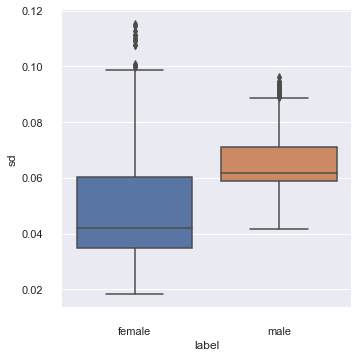

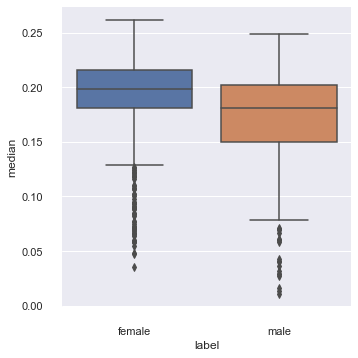

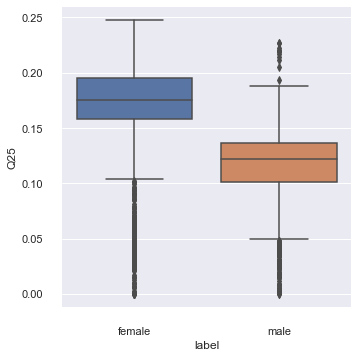

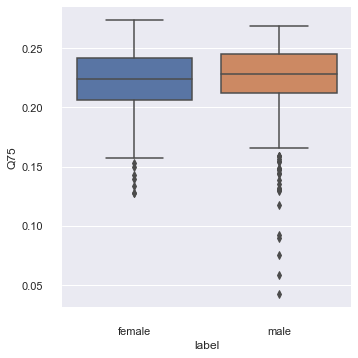

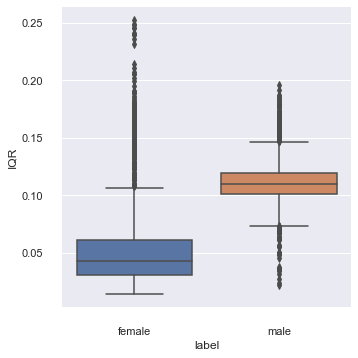

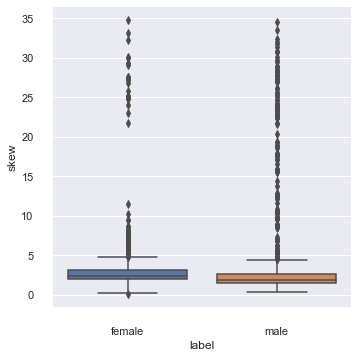

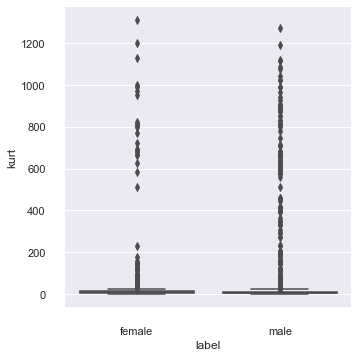

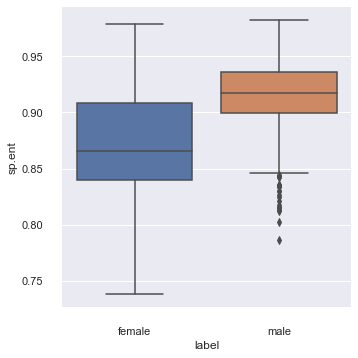

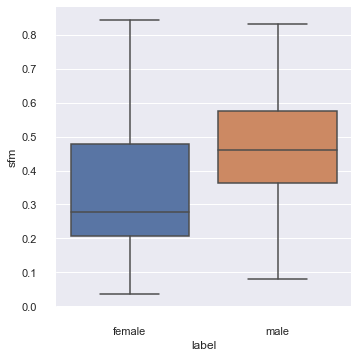

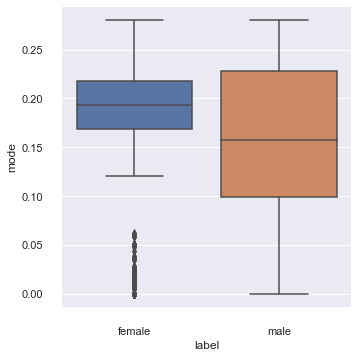

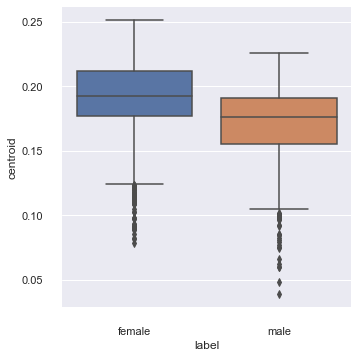

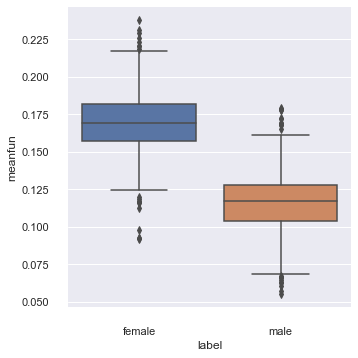

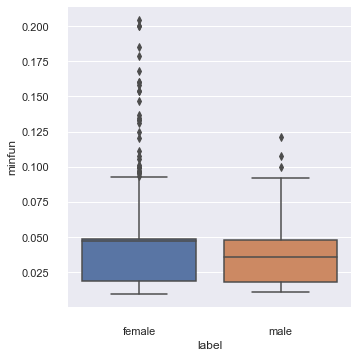

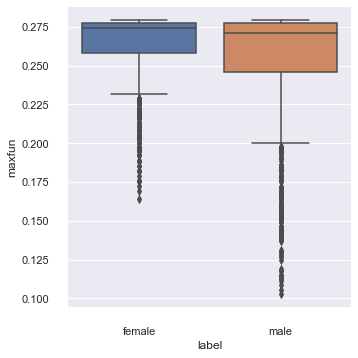

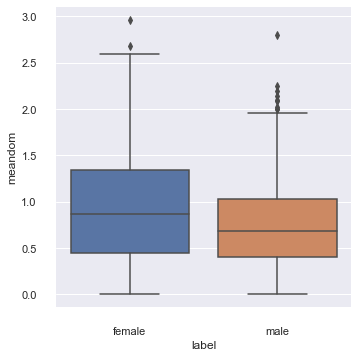

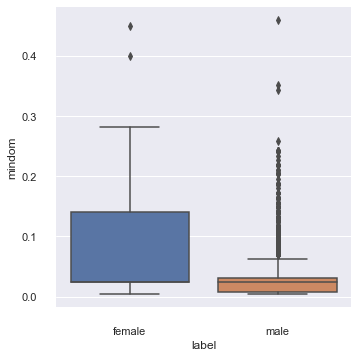

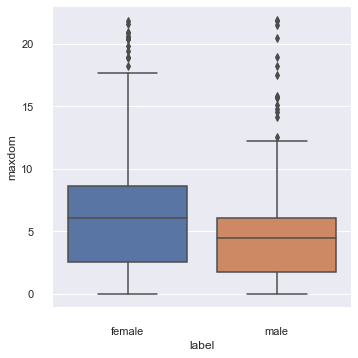

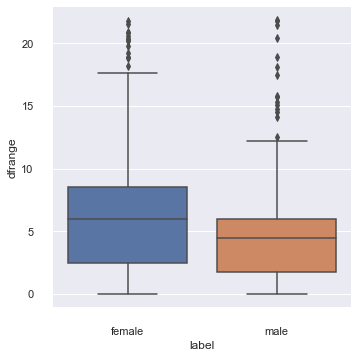

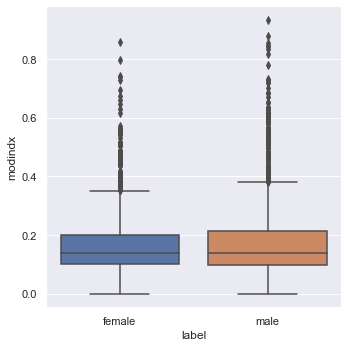

In [16]:
for i in df1.columns:
    sns.set(style="darkgrid", color_codes=True)
    sns.despine(offset=10, trim=True)
    sns.factorplot(x='label', y=i , data=df, kind='box')

# Removing outliers

In [17]:
#using  the standard 1.5 InterQuartileRange (IQR) rule
def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)
for col in df1.columns:
    lower,upper=calc_limits(col)
    df = df[(df[col] >lower) & (df[col]<upper)]
df.shape

(1607, 21)

# Removing features

In [18]:
df2 = df.copy()
df2.drop(['label','skew','kurt','centroid','mindom','maxdom'], axis=1 ,inplace=True)
df2.head()

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx
3,0.204715,0.062560,0.240105,0.133595,0.257307,0.123712,0.863854,0.302392,0.258771,0.133750,0.047059,0.279070,0.817969,9.070312,0.056247
4,0.180792,0.054554,0.194854,0.133041,0.216550,0.083509,0.915947,0.376618,0.204269,0.121079,0.047666,0.279070,1.370313,8.203125,0.152481
5,0.184188,0.043292,0.175376,0.159946,0.206989,0.047043,0.881652,0.340286,0.167849,0.155354,0.050473,0.277457,1.273604,8.367188,0.073950
6,0.185659,0.058974,0.204059,0.180295,0.216716,0.036421,0.895263,0.481777,0.212325,0.172464,0.019300,0.235294,0.475625,5.046875,0.140157
7,0.203688,0.038244,0.206030,0.192863,0.222683,0.029820,0.856981,0.299170,0.197510,0.153905,0.047013,0.277457,2.272905,8.085938,0.127536


# Normalizing the feature

In [20]:
X=df2.values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting into Training and Testing sets.¶

In [21]:
Y=df['label'].values  
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)  #one hot encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Model

In [29]:
svc=SVC(kernel='rbf',C=1, gamma=0.1)
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test,Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))

Accuracy: 0.9855072463768116
Precision: 0.9959016393442623


# Testing with new data

In [17]:
df3=pd.read_csv("./Downloads/voice_wav_to_csv.csv")
df3.drop(['skew','kurt','centroid','mindom','maxdom'], axis=1 ,inplace=True)
df3

,meanfreq,sd,median,Q25,Q75,IQR,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,dfrange,modindx
0,0.196221,0.054102,0.203611,0.154052,0.243895,0.089844,0.941951,0.342699,0.245129,0.114212,0.017798,0.275862,0.489168,2.796875,0.161106
1,0.169873,0.057356,0.161530,0.133243,0.205661,0.072418,0.947883,0.544484,0.154159,0.136421,0.017094,0.271186,0.719100,5.328125,0.159004
2,0.187277,0.063946,0.198459,0.123979,0.244481,0.120502,0.919385,0.390550,0.121353,0.120405,0.015779,0.275862,0.528254,7.640625,0.075041
3,0.215026,0.041094,0.219187,0.191254,0.244182,0.052928,0.912000,0.215323,0.217662,0.177209,0.018980,0.275862,1.210990,7.968750,0.197103
4,0.222637,0.046340,0.230665,0.205627,0.254002,0.048375,0.907851,0.316428,0.234460,0.164614,0.015717,0.275862,0.757528,6.804688,0.138696
5,0.223555,0.039335,0.227537,0.203134,0.254911,0.051777,0.901113,0.235721,0.260258,0.192639,0.016529,0.275862,0.648003,6.335938,0.100348
6,0.215649,0.058281,0.233371,0.198195,0.257598,0.059404,0.922473,0.428089,0.271377,0.142826,0.015968,0.275862,0.523650,4.757812,0.109263
7,0.181742,0.041018,0.180059,0.165478,0.200079,0.034601,0.901814,0.369465,0.186049,0.171108,0.016632,0.275862,0.444795,6.476562,0.039170
8,0.224967,0.030134,0.227735,0.209478,0.246713,0.037235,0.876609,0.141581,0.246903,0.210567,0.021362,0.275862,0.459690,5.648438,0.066042
9,0.178650,0.052799,0.161200,0.142691,0.225829,0.083138,0.920754,0.308958,0.145885,0.137538,0.016667,0.271186,0.422681,4.570312,0.108124


In [31]:
X1=df3.values
scaler = StandardScaler()
scaler.fit(X1)
X11 = scaler.transform(X1)

In [32]:
Y3=svc.predict(X11)
predictions_test = encoder.inverse_transform(Y3)
print(predictions_test)

['male' 'male' 'male' 'female' 'female' 'female' 'female' 'female'
 'female' 'male']
